<a href="https://colab.research.google.com/github/annettembeyu/week_four_core_independent_project_2020_hypothesis_testing/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2020_09_Annette_Ngao_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

*  To find out generally between weekends and weekdays when are the blue cars mostly demanded by customers.
*  To find out which month had more Blue cars demanded by customers.
*  To see if there is any correlation between the blue cars taken and the blue cars returned.
*   To determine the trend of the demand for blue cars for the first half and to make a prediction for the second half of the year.



For hypothesis testing:

**hypothesis 1**

 **Null hypothesis**: average number of cars taken on monday is the same as the average number of cars taken on friday

 **Alternative hypothesis**: average number of cars taken on monday is not the same as the average number of cars taken on friday.

**hypothesis 2**

**Null hypothesis**: the average number of cars taken on weekdays in postal code 75015 is the same as the average number of cars taken in postal code 75017.

**Alternative hypothesis**: the average number of cars taken in postal code 75015 is not the same as the average number of cars taken in postal code 75017.

### b) Defining the Metric for Success

The objectives for this analysis will have been met when:

*   determine the general trend for the demand for cars which day of the week has more demand to enable come up with ways to improve demand even further.
*   conclusion of the hypotheses is accuragtely done at a 95% confidence interval.
*   perhaps be able to predict the demand for the car in the second half of the year.

### c) Understanding the context 

The dataset for this research is about information on electric car sharing by Autolib company for different makes of car for the first half of 2016. It aslo contains the number of cars taken as well as the number cars that were returned.

My focus in my study will be on the Bluecars and the time frame of focus will be during the week days to see the number of cars taken compare with others and if there is any significant result at all.




### d) Recording the Experimental Design



1.   Loading the data
2.   Checking the data for:

        *  Number of records in the dataset
        *  Preview top records in the dataset
        *  Preview the bottom records in the dataset
        *  Appropriateness of the datatype of the variables in each columns
3.   External Data Source Validation
        * Valiation
4.   Tidying the Dataset:
        * Identifying missing values
        * Check for anomalies
        * Deal with missing data
        * More data cleaning procedure
5.   Exploratory Analysis
        * Ploting the univariate summaries and recording our observations

### e) Data Relevance

## 2. Reading the Data

In [ ]:
# Loading the Data  
# ---
# site url from which the data was obtained
# http://bit.ly/DSCoreAutolibDataset
# ---
#
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.stats import weightstats as stests
from sklearn.preprocessing import StandardScaler
sns.set(color_codes=True)
%matplotlib inline
auto_df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
#renaming the columns
auto_df.columns= ['Postal_code', 'Date', 'no_of_daily_data_points', 'Day_Of_Week', 'Day_Type', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']
auto_df.head()

,Postal_code,Date,no_of_daily_data_points,Day_Of_Week,Day_Type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# importing the file containing the description of the columns as well

data_description = pd.read_excel('columns_explanation.xlsx')
data_description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## 3. Checking the Data

In [ ]:
# Finding the no. of records in the dataset
#
print(auto_df.shape)

# the dataset has (16,085 rows and 13 columns)

(16085, 13)


In [ ]:
# Previewing the top of the dataset
#
auto_df.head(10)

,Postal_code,Date,no_of_daily_data_points,Day_Of_Week,Day_Type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [ ]:
# Previewing the bottom of the dataset
# 
auto_df.tail(10)

,Postal_code,Date,no_of_daily_data_points,Day_Of_Week,Day_Type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# to display different rows from different parts of the dataframe

auto_df.sample(10)

,Postal_code,Date,no_of_daily_data_points,Day_Of_Week,Day_Type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5305,92150,1/5/2018,1440,4,weekday,164,176,3,6,12,15,4,4
3033,75020,3/14/2018,1440,2,weekday,404,421,10,7,54,47,139,142
11433,93310,4/12/2018,1440,3,weekday,18,17,0,0,0,0,0,0
4673,92100,6/15/2018,1440,4,weekday,438,428,13,11,19,22,11,11
5145,92140,1/1/2018,1440,0,weekday,66,74,4,5,5,3,0,0
1512,75010,4/22/2018,1440,6,weekend,425,410,13,10,56,52,105,95
8324,92360,3/14/2018,1440,2,weekday,5,5,1,1,1,2,0,0
12169,93400,5/28/2018,1440,0,weekday,121,110,5,5,6,6,0,0
6694,92240,6/9/2018,1440,5,weekend,118,112,4,4,8,9,0,0
8233,92350,5/28/2018,1440,0,weekday,19,20,1,0,5,2,0,0


In [ ]:
# Checking for unique value and whether each column has an appropriate datatype
#
print(auto_df.nunique())
auto_df.info()

Postal_code                104
Date                       156
no_of_daily_data_points     23
Day_Of_Week                  7
Day_Type                     2
BlueCars_taken_sum         932
BlueCars_returned_sum      929
Utilib_taken_sum            48
Utilib_returned_sum         49
Utilib_14_taken_sum         92
Utilib_14_returned_sum      94
Slots_freed_sum            297
Slots_taken_sum            301
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Postal_code              16085 non-null  int64 
 1   Date                     16085 non-null  object
 2   no_of_daily_data_points  16085 non-null  int64 
 3   Day_Of_Week              16085 non-null  int64 
 4   Day_Type                 16085 non-null  object
 5   BlueCars_taken_sum       16085 non-null  int64 
 6   BlueCars_returned_sum    16085 non-null  int64

In [ ]:
#checking for data types
auto_df.dtypes

Postal_code                 int64
Date                       object
no_of_daily_data_points     int64
Day_Of_Week                 int64
Day_Type                   object
BlueCars_taken_sum          int64
BlueCars_returned_sum       int64
Utilib_taken_sum            int64
Utilib_returned_sum         int64
Utilib_14_taken_sum         int64
Utilib_14_returned_sum      int64
Slots_freed_sum             int64
Slots_taken_sum             int64
dtype: object

In [ ]:
# printing out the particuar unique values in each of the columns in the data
for x in auto_df.columns:
    print(x,auto_df[x].unique())
    print('--------------------------------------------------------------------------------')

Postal_code [75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]
--------------------------------------------------------------------------------
Date ['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/201

In [ ]:
#Checking whether there are any null values
auto_df.isnull().values.any()

# there are no null value in the data

False

In [ ]:
# checking the number of null values in the atribuutes
auto_df.isnull().sum()

Postal_code                0
Date                       0
no_of_daily_data_points    0
Day_Of_Week                0
Day_Type                   0
BlueCars_taken_sum         0
BlueCars_returned_sum      0
Utilib_taken_sum           0
Utilib_returned_sum        0
Utilib_14_taken_sum        0
Utilib_14_returned_sum     0
Slots_freed_sum            0
Slots_taken_sum            0
dtype: int64

In [ ]:
# checking out for any duplicates in the data

auto_df.duplicated().value_counts()

#  there are no duplicates in the dataset

False    16085
dtype: int64

In [ ]:
# checking the columns heads
print("Columns of the Dataframe:")
print(auto_df.columns)

Columns of the Dataframe:
Index(['Postal_code', 'Date', 'no_of_daily_data_points', 'Day_Of_Week',
       'Day_Type', 'BlueCars_taken_sum', 'BlueCars_returned_sum',
       'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum',
       'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')


In [ ]:
# descriptive statistics of the dataset
# picking the numeric columns
num_df = auto_df[['no_of_daily_data_points', 'Day_Type', 'BlueCars_taken_sum', 'BlueCars_returned_sum','Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum','Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']]
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_daily_data_points,16085.0,1431.330619,33.212050,1174.0,1439.0,1440.0,1440.0,1440.0
BlueCars_taken_sum,16085.0,125.926951,185.426579,0.0,20.0,46.0,135.0,1352.0
BlueCars_returned_sum,16085.0,125.912714,185.501535,0.0,20.0,46.0,135.0,1332.0
Utilib_taken_sum,16085.0,3.698290,5.815058,0.0,0.0,1.0,4.0,54.0
Utilib_returned_sum,16085.0,3.699099,5.824634,0.0,0.0,1.0,4.0,58.0
Utilib_14_taken_sum,16085.0,8.600560,12.870098,0.0,1.0,3.0,10.0,100.0
Utilib_14_returned_sum,16085.0,8.599192,12.868993,0.0,1.0,3.0,10.0,101.0
Slots_freed_sum,16085.0,22.629033,52.120263,0.0,0.0,0.0,5.0,360.0
Slots_taken_sum,16085.0,22.629282,52.146030,0.0,0.0,0.0,5.0,359.0


In [ ]:
# converting the date column to datetime object since it s stored as string 
auto_df['Date'] = pd.to_datetime(auto_df['Date'])
auto_df.dtypes

Postal_code                         int64
Date                       datetime64[ns]
no_of_daily_data_points             int64
Day_Of_Week                         int64
Day_Type                           object
BlueCars_taken_sum                  int64
BlueCars_returned_sum               int64
Utilib_taken_sum                    int64
Utilib_returned_sum                 int64
Utilib_14_taken_sum                 int64
Utilib_14_returned_sum              int64
Slots_freed_sum                     int64
Slots_taken_sum                     int64
dtype: object

In [ ]:
# finding the descriptive statistics after changing the data type for the Date column
auto_df.Date.describe()

count                   16085
unique                    156
top       2018-06-12 00:00:00
freq                      104
first     2018-01-01 00:00:00
last      2018-06-19 00:00:00
Name: Date, dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

The data was obtained from:[Link](http://bit.ly/DSCoreAutolibDataset).

### a.Validation

## 5. Tidying the Dataset

In [ ]:
# dropping some columns to remain with the attributes of interest
auto_df.drop(['no_of_daily_data_points','Utilib_taken_sum','Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum','Slots_freed_sum', 'Slots_taken_sum'], axis=1, inplace=True)
print("Columns of the Dataframe:")
print(auto_df.columns)


Columns of the Dataframe:
Index(['Postal_code', 'Date', 'Day_Of_Week', 'Day_Type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum'],
      dtype='object')


In [ ]:
# checking for anomalies in blue cars taken
Q1= auto_df.BlueCars_taken_sum.quantile(0.25)
Q3= auto_df.BlueCars_taken_sum.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#(auto_df.BlueCars_taken_sum  < (Q1 - 1.5 * IQR)) |(auto_df.BlueCars_taken_sum  > (Q3 + 1.5 * IQR))

115.0


Text(0.5, 1.0, 'Distribution of blue cars taken')

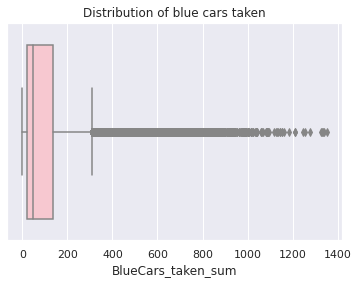

In [ ]:
# visual drawing to show outliers in blue cars taken
sns.boxplot(auto_df['BlueCars_taken_sum'], color='pink')
plt.title('Distribution of blue cars taken')

In [ ]:
# checking for anomalies in bluecars returned
Q1= auto_df.BlueCars_returned_sum.quantile(0.25)
Q3= auto_df.BlueCars_returned_sum .quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#(auto_df.BlueCars_returned_sum   < (Q1 - 1.5 * IQR)) |(auto_df.BlueCars_returned_sum  > (Q3 + 1.5 * IQR))

115.0


Text(0.5, 1.0, 'Distribution of blue cars returned')

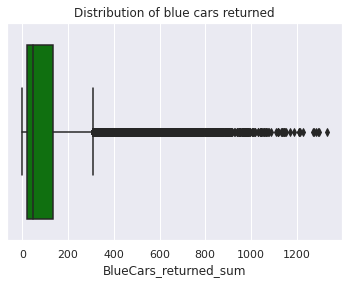

In [ ]:
# visual drawing to show outliers in blue cars returned
sns.boxplot(auto_df['BlueCars_returned_sum'], color='green')
plt.title('Distribution of blue cars returned')

In [ ]:
# checking for outliers in 
Q1= auto_df.Day_Of_Week.quantile(0.25)
Q3= auto_df.Day_Of_Week.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#(auto_df.Day_Of_Week < (Q1 - 1.5 * IQR)) |(auto_df.Day_Of_Week > (Q3 + 1.5 * IQR))

4.0


In [ ]:
# checking for skewness in the data
auto_df.skew()

Postal_code             -1.168778
Day_Of_Week              0.018824
BlueCars_taken_sum       2.406355
BlueCars_returned_sum    2.412085
Month                    0.148530
dtype: float64

In [ ]:
# checking for kurtosis in the data
auto_df.kurt()

Postal_code             -0.542143
Day_Of_Week             -1.260994
BlueCars_taken_sum       6.172692
BlueCars_returned_sum    6.186288
Month                   -1.111356
dtype: float64

In [ ]:
# Identifying the Missing Data
#
auto_df.isnull().sum().sort_values(ascending= False)

BlueCars_returned_sum    0
BlueCars_taken_sum       0
Day_Type                 0
Day_Of_Week              0
Date                     0
Postal_code              0
dtype: int64

## 6. Exploratory Analysis

**Univariate analysis**

In [ ]:
# getting the counts for the postal codes in the data set
print(auto_df['Postal_code'].value_counts().head(20))

print('The postal code appearing most is:')
print(auto_df.Postal_code.mode())

94130    156
92310    156
78140    156
94700    156
95100    156
75006    156
75014    156
92150    156
92190    156
92230    156
92270    156
92350    156
94340    156
93110    156
93230    156
93310    156
93350    156
75007    156
75015    156
75019    156
Name: Postal_code, dtype: int64
The postal code appearing most is:
0     75001
1     75002
2     75003
3     75004
4     75005
      ...  
84    94700
85    94800
86    95100
87    95870
88    95880
Length: 89, dtype: int64


In [ ]:
# getting the counts for day type in the data set
print(auto_df['Day_Type'].value_counts().head())

print('The day type appearing most is:')
print(auto_df.Day_Type.mode())

weekday    11544
weekend     4541
Name: Day_Type, dtype: int64
The day type appearing most is:
0    weekday
dtype: object


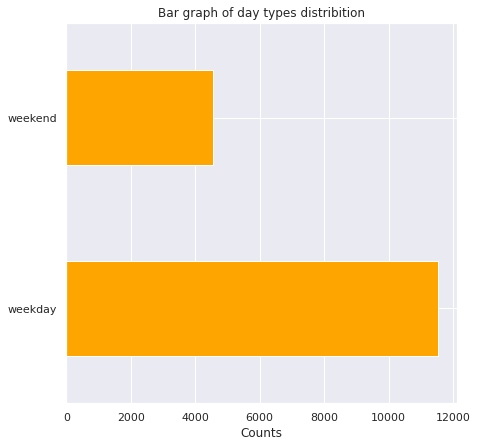

In [ ]:
# the distribution of the car demand on weekend and weekday 
auto_df['Day_Type'].value_counts().plot(kind='barh', figsize=(7,7), color='orange')
plt.xlabel('Counts')
plt.title('Bar graph of day types distribition')
plt.show()

In [ ]:
# getting the counts for day type in the data set
print(auto_df['Day_Of_Week'].value_counts())

print('The day of the week appearing most is:')
print(auto_df.Day_Type.mode())

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: Day_Of_Week, dtype: int64
The day of the week appearing most is:
0    weekday
dtype: object


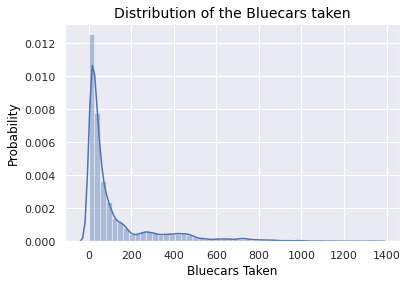

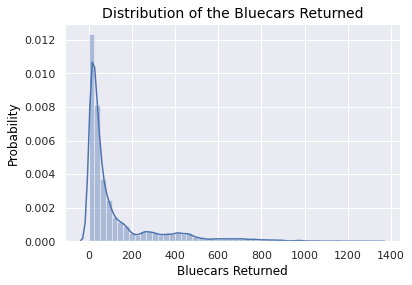

In [ ]:
#plotting a histogram for the blue car taken and the blue cars returned
#

sns.distplot(auto_df.BlueCars_taken_sum, bins = None)


plt.xlabel('Bluecars Taken', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of the Bluecars taken', color = 'black', fontsize = 14)
plt.show()
print('\n')

sns.distplot(auto_df.BlueCars_returned_sum, bins = None)


plt.xlabel('Bluecars Returned', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of the Bluecars Returned', color = 'black', fontsize = 14)
plt.show()


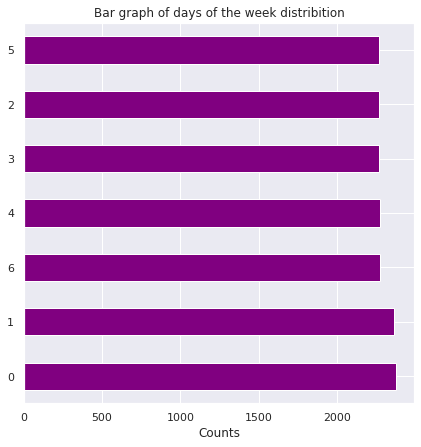

In [ ]:
# the distribution of installations in the zones 
auto_df['Day_Of_Week'].value_counts().plot(kind='barh', figsize=(7,7), color='purple')
plt.xlabel('Counts')
plt.title('Bar graph of days of the week distribition')
plt.show()

In [ ]:
# the data was aggregated in 2018
# extracting only the month from the Date column and forming a new column month
auto_df['Month']=pd.DatetimeIndex(auto_df['Date']).month
auto_df

,Postal_code,Date,Day_Of_Week,Day_Type,BlueCars_taken_sum,BlueCars_returned_sum,Month
0,75001,2018-01-01,0,weekday,110,103,1
1,75001,2018-01-02,1,weekday,98,94,1
2,75001,2018-01-03,2,weekday,138,139,1
3,75001,2018-01-04,3,weekday,104,104,1
4,75001,2018-01-05,4,weekday,114,117,1
...,...,...,...,...,...,...,...
16080,95880,2018-06-15,4,weekday,15,10,6
16081,95880,2018-06-16,5,weekend,19,19,6
16082,95880,2018-06-17,6,weekend,33,35,6
16083,95880,2018-06-18,0,weekday,11,14,6


In [ ]:
auto_df.Month.value_counts()

1    3195
3    3185
4    3094
2    2573
5    2078
6    1960
Name: Month, dtype: int64

<function matplotlib.pyplot.show>

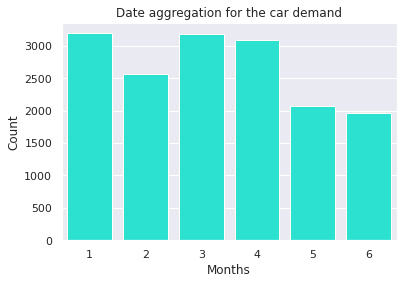

In [ ]:
# finding the distribution of the demand for cars in each month
sns.countplot(auto_df.Month, color='#0EFFE9')
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Date aggregation for the car demand')
plt.show

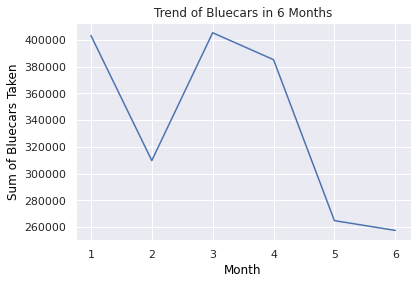

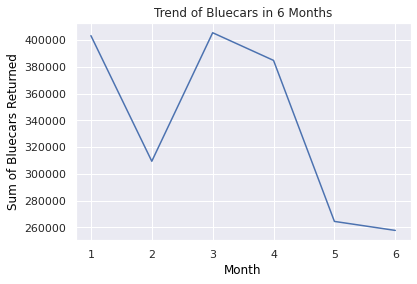

In [ ]:
# plotting a line graph showing the trend of the total usage of bluecars in each month.
#
auto_df.groupby('Month')['BlueCars_taken_sum'].sum().plot()
plt.xlabel('Month', fontsize = 12, color = 'black')
plt.ylabel('Sum of Bluecars Taken', fontsize = 12, color = 'black')
plt.title('Trend of Bluecars in 6 Months')

plt.show()
print('\n')

auto_df.groupby('Month')['BlueCars_returned_sum'].sum().plot()
plt.xlabel('Month', fontsize = 12, color = 'black')
plt.ylabel('Sum of Bluecars Returned', fontsize = 12, color = 'black')
plt.title('Trend of Bluecars in 6 Months')

plt.show()

**Bivariate anaysis**

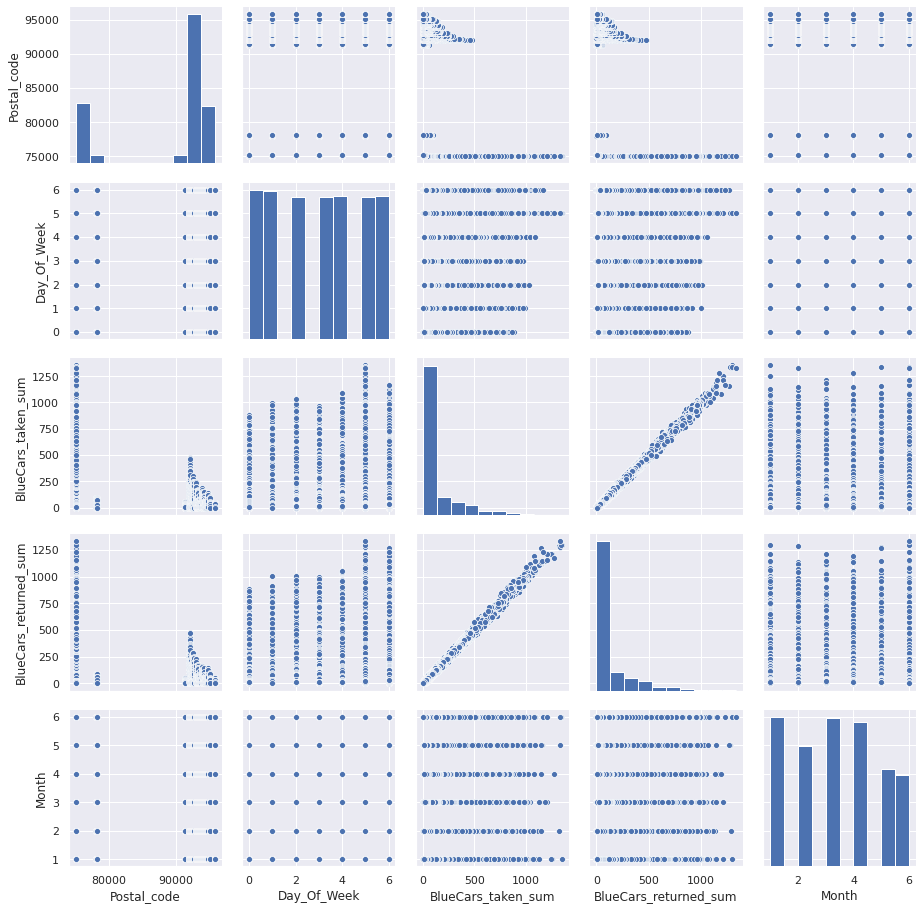

In [ ]:
# outputting a pairplot to see the bivariate relationship in the data
sns.pairplot(auto_df)

In [ ]:
# looking at the car demand by month and postal code for the blue cars
auto_df[['Postal_code', 'Month', 'BlueCars_taken_sum', 'BlueCars_returned_sum']].groupby(['Month', 'Postal_code']).agg(['mean', 'count'])

BlueCars_taken_sum       BlueCars_returned_sum      
                                mean count                  mean count
Month Postal_code                                                     
1     75001               133.000000    31            132.741935    31
      75002               175.258065    31            174.774194    31
      75003               249.516129    31            248.709677    31
      75004               216.645161    31            215.935484    31
      75005               324.709677    31            324.193548    31
...                              ...   ...                   ...   ...
6     94700                40.421053    19             40.210526    19
      94800                90.000000    19             89.526316    19
      95100                22.631579    19             22.052632    19
      95870                13.789474    19             14.052632    19
      95880                16.736842    19             16.578947    19

[624 rows x 4 columns]

In [ ]:
# the count of blue cars taken and returned grouped by postal cod and the day type
auto_df[['Postal_code', 'Day_Type', 'BlueCars_taken_sum', 'BlueCars_returned_sum']].groupby(['Postal_code', 'Day_Type']).agg(['mean', 'count'])

BlueCars_taken_sum       BlueCars_returned_sum      
                                   mean count                  mean count
Postal_code Day_Type                                                     
75001       weekday          117.241071   112            116.741071   112
            weekend          178.727273    44            179.522727    44
75002       weekday          158.955357   112            157.723214   112
            weekend          212.272727    44            215.090909    44
75003       weekday          211.196429   112            208.330357   112
...                                 ...   ...                   ...   ...
95100       weekend           34.090909    44             32.090909    44
95870       weekday           13.669643   112             13.642857   112
            weekend           19.250000    44             19.227273    44
95880       weekday           11.205357   112             12.241071   112
            weekend           28.022727    44             25.386364    44

[208 rows x 4 columns]

In [ ]:
# count of blue cars taken and returned grouped by day of week 
auto_df[['Day_Of_Week', 'BlueCars_taken_sum', 'BlueCars_returned_sum']].groupby('Day_Of_Week').agg(['mean', 'count'])

BlueCars_taken_sum       BlueCars_returned_sum      
                          mean count                  mean count
Day_Of_Week                                                     
0                   111.159646  2374            111.545072  2374
1                   110.850614  2363            110.228523  2363
2                   115.453704  2268            114.935185  2268
3                   116.052469  2268            115.944004  2268
4                   127.056803  2271            125.948481  2271
5                   156.124393  2267            155.081606  2267
6                   146.071240  2274            148.986368  2274

In [ ]:
# count of blue cars taken ad returned gruped by month
auto_df[['Month', 'BlueCars_taken_sum', 'BlueCars_returned_sum']].groupby('Month').agg(['mean', 'count'])

BlueCars_taken_sum       BlueCars_returned_sum      
                    mean count                  mean count
Month                                                     
1             126.189045  3195            126.228795  3195
2             120.368442  2573            120.267781  2573
3             127.231083  3185            127.309262  3185
4             124.467679  3094            124.373303  3094
5             127.436959  2078            127.285371  2078
6             131.380102  1960            131.513265  1960

In [ ]:
# count of blue cars taken ad returned gruped by day type
auto_df[['Day_Type', 'BlueCars_taken_sum', 'BlueCars_returned_sum']].groupby('Day_Type').agg(['mean', 'count'])

BlueCars_taken_sum        BlueCars_returned_sum       
                       mean  count                  mean  count
Day_Type                                                       
weekday          116.028673  11544            115.639380  11544
weekend          151.090068   4541            152.029289   4541

In [ ]:
# count of blue cars taken ad returned gruped by postal code
auto_df[['Postal_code', 'BlueCars_taken_sum', 'BlueCars_returned_sum']].groupby('Postal_code').agg(['mean', 'count'])

BlueCars_taken_sum       BlueCars_returned_sum      
                          mean count                  mean count
Postal_code                                                     
75001               134.583333   156            134.448718   156
75002               173.993590   156            173.903846   156
75003               238.384615   156            238.166667   156
75004               201.628205   156            201.596154   156
75005               306.192308   156            306.108974   156
...                        ...   ...                   ...   ...
94700                33.897436   156             33.903846   156
94800                80.038462   156             79.980769   156
95100                23.993590   156             23.903846   156
95870                15.243590   156             15.217949   156
95880                15.948718   156             15.948718   156

[104 rows x 4 columns]

Text(0.5, 1.0, 'Relationship between cars taken and car returned')

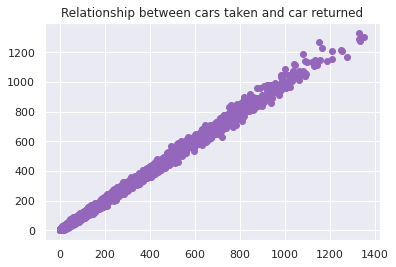

In [ ]:
plt.scatter(x=auto_df.BlueCars_taken_sum, y=auto_df.BlueCars_returned_sum, c= '#9467bd')
plt.title('Relationship between cars taken and car returned')

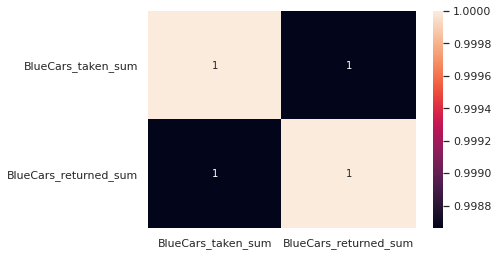

In [ ]:
# checking if there is any relationship between the cars taken and the cars returned
auto_dem = auto_df[['BlueCars_taken_sum', 'BlueCars_returned_sum']]
sns.heatmap(auto_dem.corr(),annot=True)
plt.show()

In [ ]:
# Checking the quantity of the relationshp between the cars taken and those returned
auto_dem.corr()

,BlueCars_taken_sum,BlueCars_returned_sum
BlueCars_taken_sum,1.00000,0.99866
BlueCars_returned_sum,0.99866,1.00000


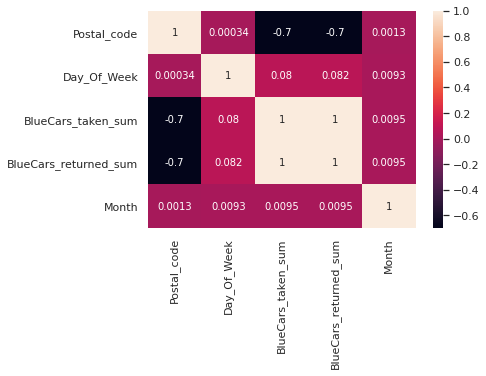

In [ ]:
sns.heatmap(auto_df.corr(),annot=True)
plt.show()

**Sampling**

In [ ]:
# making a dataframe containing information only for the weekdays
weekdays= auto_df.loc[auto_df.Day_Type=='weekday']
print(weekdays)
print(weekdays.shape)

       Postal_code       Date  ...  BlueCars_returned_sum Month
0            75001 2018-01-01  ...                    103     1
1            75001 2018-01-02  ...                     94     1
2            75001 2018-01-03  ...                    139     1
3            75001 2018-01-04  ...                    104     1
4            75001 2018-01-05  ...                    117     1
...            ...        ...  ...                    ...   ...
16078        95880 2018-06-13  ...                     13     6
16079        95880 2018-06-14  ...                     13     6
16080        95880 2018-06-15  ...                     10     6
16083        95880 2018-06-18  ...                     14     6
16084        95880 2018-06-19  ...                      2     6

[11544 rows x 7 columns]
(11544, 7)


In [ ]:
weekdays.Day_Of_Week.value_counts()

0    2374
1    2363
4    2271
3    2268
2    2268
Name: Day_Of_Week, dtype: int64

In [ ]:
# creating a data frame containing information for monday only
mondays= weekdays.loc[weekdays.Day_Of_Week==0]
print(mondays)
print(mondays.shape)

       Postal_code       Date  ...  BlueCars_returned_sum Month
0            75001 2018-01-01  ...                    103     1
7            75001 2018-01-08  ...                     83     1
14           75001 2018-01-15  ...                    107     1
21           75001 2018-01-22  ...                    116     1
28           75001 2018-01-29  ...                     81     1
...            ...        ...  ...                    ...   ...
16055        95880 2018-05-21  ...                     27     5
16062        95880 2018-05-28  ...                      5     5
16069        95880 2018-06-04  ...                     13     6
16076        95880 2018-06-11  ...                     18     6
16083        95880 2018-06-18  ...                     14     6

[2374 rows x 7 columns]
(2374, 7)


In [ ]:
# picking a random sample from the mondays dataframe using the sample function from the mondays dataframe

mondays_sample = mondays.sample(n= 331, axis = 0, replace = False) # Simple random sampling
mondays_sample.head()

,Postal_code,Date,Day_Of_Week,Day_Type,BlueCars_taken_sum,BlueCars_returned_sum,Month
5098,92130,2018-04-23,0,weekday,246,203,4
9009,92400,2018-05-28,0,weekday,97,101,5
2964,75020,2018-01-01,0,weekday,540,605,1
15198,94500,2018-02-19,0,weekday,13,12,2
10027,93100,2018-03-05,0,weekday,110,117,3


In [ ]:
fridays= weekdays.loc[weekdays.Day_Of_Week==4]
print(fridays)
print(fridays.shape)

       Postal_code       Date  ...  BlueCars_returned_sum Month
4            75001 2018-01-05  ...                    117     1
11           75001 2018-01-12  ...                    127     1
18           75001 2018-01-19  ...                    130     1
25           75001 2018-01-26  ...                    146     1
32           75001 2018-02-02  ...                    147     2
...            ...        ...  ...                    ...   ...
16049        95880 2018-05-04  ...                     20     5
16059        95880 2018-05-25  ...                     10     5
16066        95880 2018-06-01  ...                     10     6
16073        95880 2018-06-08  ...                      9     6
16080        95880 2018-06-15  ...                     10     6

[2271 rows x 7 columns]
(2271, 7)


In [ ]:
# picking a random sample from the fridays dataframe using the sample function from the mondays dataframe

fridays_sample = fridays.sample(n= 329, axis = 0, replace = False) # Simple random sampling
fridays_sample.head()

,Postal_code,Date,Day_Of_Week,Day_Type,BlueCars_taken_sum,BlueCars_returned_sum,Month
13429,94110,2018-06-15,4,weekday,41,37,6
14076,94160,2018-01-19,4,weekday,58,53,1
9234,92420,2018-02-16,4,weekday,7,7,2
13741,94130,2018-06-15,4,weekday,71,76,6
10267,93110,2018-06-08,4,weekday,28,26,6


**Testing for normality for the samples**

In [ ]:
# We will test is the Bluecars Taken on monday

stat, p = shapiro(mondays_sample.BlueCars_taken_sum)
print('Statistic = %.3f, p = %.3f' % (stat, p))


# The confidence interval is defined as alpha
alpha = 0.05
if p > alpha:
  print('The bluecars taken follows a normal distribution')
else:
  print('The data does not follow a normal distribution')

Statistic = 0.648, p = 0.000
The data does not follow a normal distribution


In [ ]:
# fitting the sample to become normal
norm_samp=norm.fit(mondays_sample.BlueCars_taken_sum)
norm_samp


(114.39577039274924, 172.3928201910089)

In [ ]:
normal_monday=mondays_sample.loc[(mondays_sample['BlueCars_taken_sum']> norm_samp[0]) &(mondays_sample['BlueCars_taken_sum']< norm_samp[1])]
normal_monday

,Postal_code,Date,Day_Of_Week,Day_Type,BlueCars_taken_sum,BlueCars_returned_sum,Month
5389,92150,2018-04-02,0,weekday,130,127,4
9469,92500,2018-05-21,0,weekday,139,127,5
7452,92300,2018-05-07,0,weekday,137,141,5
4489,92000,2018-05-07,0,weekday,171,168,5
9632,92600,2018-05-28,0,weekday,145,158,5
10100,93100,2018-05-28,0,weekday,138,135,5
535,75004,2018-03-12,0,weekday,156,152,3
10069,93100,2018-04-16,0,weekday,118,107,4
9781,92700,2018-05-21,0,weekday,122,126,5
9995,93100,2018-01-29,0,weekday,119,129,1


In [ ]:
# getting the shape of the normmalized data means that the t test will be used
normal_monday.shape

(21, 7)

In [ ]:
# # confirming that the normalized data from the monday sample is now normal

stat, p = shapiro(normal_monday.BlueCars_taken_sum)
print('Statistic = %.3f, p = %.3f' % (stat, p))


# The confidence interval is defined as alpha
alpha = 0.05
if p > alpha:
  print('The bluecars taken follows a normal distribution')
else:
  print('The data does not follow a normal distribution')

Statistic = 0.915, p = 0.070
The bluecars taken follows a normal distribution


In [ ]:
# # confirming that the normalized data from the monday sample is now normal

stat, p = shapiro(fridays_sample.BlueCars_taken_sum)
print('Statistic = %.3f, p = %.3f' % (stat, p))


# The confidence interval is defined as alpha
alpha = 0.05
if p > alpha:
  print('The bluecars taken follows a normal distribution')
else:
  print('The data does not follow a normal distribution')

Statistic = 0.650, p = 0.000
The data does not follow a normal distribution


In [ ]:
# normalizing the fridays sample data frame
fri_samp= norm.fit(fridays_sample.BlueCars_taken_sum)
fri_samp

(132.29179331306992, 197.38574077712295)

In [ ]:
normal_friday=fridays_sample.loc[(fridays_sample['BlueCars_taken_sum']> fri_samp[0]) &(fridays_sample['BlueCars_taken_sum']< fri_samp[1])]
normal_friday

,Postal_code,Date,Day_Of_Week,Day_Type,BlueCars_taken_sum,BlueCars_returned_sum,Month
337,75003,2018-01-26,4,weekday,191,197,1
9775,92700,2018-05-04,4,weekday,166,150,5
151,75001,2018-06-15,4,weekday,150,150,6
25,75001,2018-01-26,4,weekday,145,146,1
7459,92300,2018-05-25,4,weekday,161,159,5
9531,92600,2018-02-02,4,weekday,144,128,2
4472,92000,2018-04-20,4,weekday,155,163,4
255,75002,2018-04-13,4,weekday,184,185,4
9361,92500,2018-01-19,4,weekday,160,156,1
9503,92600,2018-01-05,4,weekday,143,144,1


In [ ]:
# checking the shape of the normalized sample for fridays
normal_friday.shape

(26, 7)

In [ ]:

# # confirming that the normalized data from the friday sample is now normal

stat, p = shapiro(normal_friday.BlueCars_taken_sum)
print('Statistic = %.3f, p = %.3f' % (stat, p))


# The confidence interval is defined as alpha
alpha = 0.05
if p > alpha:
  print('The bluecars taken follows a normal distribution')
else:
  print('The data does not follow a normal distribution')

Statistic = 0.937, p = 0.117
The bluecars taken follows a normal distribution


**Hypothesis Testing**

In [ ]:
# focus will be on the weekdays

# count of blue cars taken ad returned gruped by month
auto_df[['Day_Of_Week', 'BlueCars_taken_sum']].groupby('Day_Of_Week').agg(['mean', 'count'])

BlueCars_taken_sum      
                          mean count
Day_Of_Week                         
0                   111.159646  2374
1                   110.850614  2363
2                   115.453704  2268
3                   116.052469  2268
4                   127.056803  2271
5                   156.124393  2267
6                   146.071240  2274

#### Test of Hypothesis

---



>#### Null Hypothesis
>$H_0 : μ_1  = μ_2 $
>#### Alternative Hypothesis
>$H_1 : μ_1 ≠ μ_2$

In [ ]:
# carrying out the hypothesis test between the average number of cars taken on monday and the average number of cars in firday
mon_mean = np.mean(normal_monday.BlueCars_taken_sum)
fri_mean = np.mean(normal_friday.BlueCars_taken_sum)
print("monday mean value:",fri_mean)
print("friday mean value:",fri_mean)
mon_std = np.std(normal_monday.BlueCars_taken_sum)
fri_std = np.std(normal_friday.BlueCars_taken_sum)
print("monday std value:",mon_std)
print("friday std value:",fri_std)
ttest,pval = stats.ttest_ind(normal_monday.BlueCars_taken_sum,normal_friday.BlueCars_taken_sum)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

monday mean value: 160.07692307692307
friday mean value: 160.07692307692307
monday std value: 17.416206907319076
friday std value: 16.25262837186905
p-value 3.385417246266644e-05
we reject null hypothesis


In [156]:
# carrying out the hypothesis test between the average number of cars returned on monday and the average number of cars in firday
mon_mean1 = np.mean(normal_monday.BlueCars_returned_sum)
fri_mean1 = np.mean(normal_friday.BlueCars_returned_sum)
print("monday mean value:",fri_mean1)
print("friday mean value:",fri_mean1)
mon_std1 = np.std(normal_monday.BlueCars_returned_sum)
fri_std1 = np.std(normal_friday.BlueCars_returned_sum)
print("monday std value:",mon_std1)
print("friday std value:",fri_std1)
ttest,pval = stats.ttest_ind(normal_monday.BlueCars_returned_sum,normal_friday.BlueCars_returned_sum)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

monday mean value: 158.07692307692307
friday mean value: 158.07692307692307
monday std value: 18.276907601504224
friday std value: 18.755354265101673
p-value 0.0002624278632689804
we reject null hypothesis
